In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


In [2]:
train=pd.read_csv("train.csv",sep=",")
#train=pd.read_csv("/content/drive/My Drive/train.csv",sep=",")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
test=pd.read_csv("test.csv",sep=",")
#test=pd.read_csv("/content/drive/My Drive/test.csv",sep=",")
#test.head()

In [4]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [0]:
'''
Concatnating the two dataframes
df1 = DataFrame1
df2 = DataFrame2
data = Concatnated Dataset
'''
def cnct(df1,df2):
    data = pd.concat([df1,df2],sort="False")
    return data

In [0]:
'''
Seperate Dataset into two dataframe
Data = input Dataset
tr = training Dataset
te = testing Dataset
'''

def seprate(data):
    tr = data.iloc[:len(train)]
    te = data.iloc[len(train):]
    return tr, te

In [7]:
train.shape  #checking shape of the train df

(891, 12)

In [8]:
test.shape   #checking shape of the test df

(418, 11)

In [9]:
df=cnct(train,test)  #concatnating the two dataframe
df.tail()            #checking the last 5 instances 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [10]:
df.shape   # shape of concatinated df

(1309, 12)

In [11]:
import pandas_profiling
pandas_profiling.ProfileReport(df)    # making profiling report for better unstanding of data

Number of variables,13
Number of observations,1309
Total Missing (%),10.0%
Total size in memory,133.0 KiB
Average record size in memory,104.1 B
Numeric,8
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [12]:
df.isnull().sum()   # checking null values in data

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [0]:
df['Age']=df['Age'].fillna(df['Age'].median()) # Imputing age column with median
df['Embarked'] = df['Embarked'].fillna('C')    # Imputing Embarked column with C
df['Fare'] = df['Fare'].fillna(df['Fare'].median())# Imputing Fare column with median
df['Cabin']= df['Cabin'].fillna('Z')           # Imputing Cabin column with C


In [14]:
df.isnull().sum()  #checking null values again

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [15]:
df.dtypes   #chekcing type of each feature

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

In [0]:
df['Cabin']    = df['Cabin'].apply(lambda x: str(x)[0])

In [17]:
df["Cabin"].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [18]:
import seaborn as sns
sns.barplot(x= 'Cabin', y = 'Survived', data = df ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])

In [0]:
df['Cabin'] = df['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
df['Cabin'] = df['Cabin'].replace(['F', 'C'], 'M')        #Medium
df['Cabin'] = df['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
df['Cabin'] = df['Cabin'].replace(['Z'],'X')              #Missing


In [0]:
#categorising Embarked, Sex and CabinGroup
  
df['Embarked'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}) 
df['Sex']      = df['Sex'].map({'male': 1,'female':0})
df['CabinGroup'] = df['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})


In [0]:
train_df,test_df=seprate(df)  #splitting dataset in train and test

In [22]:
train_df.shape   #  checking shape of train

(891, 13)

In [23]:
train_df.columns # checking columns of dataframe

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'CabinGroup'],
      dtype='object')

In [24]:


X = train_df.drop(['Survived',"Name","Cabin","Ticket",'PassengerId'],axis = 1)  # making FEture column 
y = train_df['Survived']       # making target column
X.shape , y.shape    #checking shape of data

((891, 8), (891,))

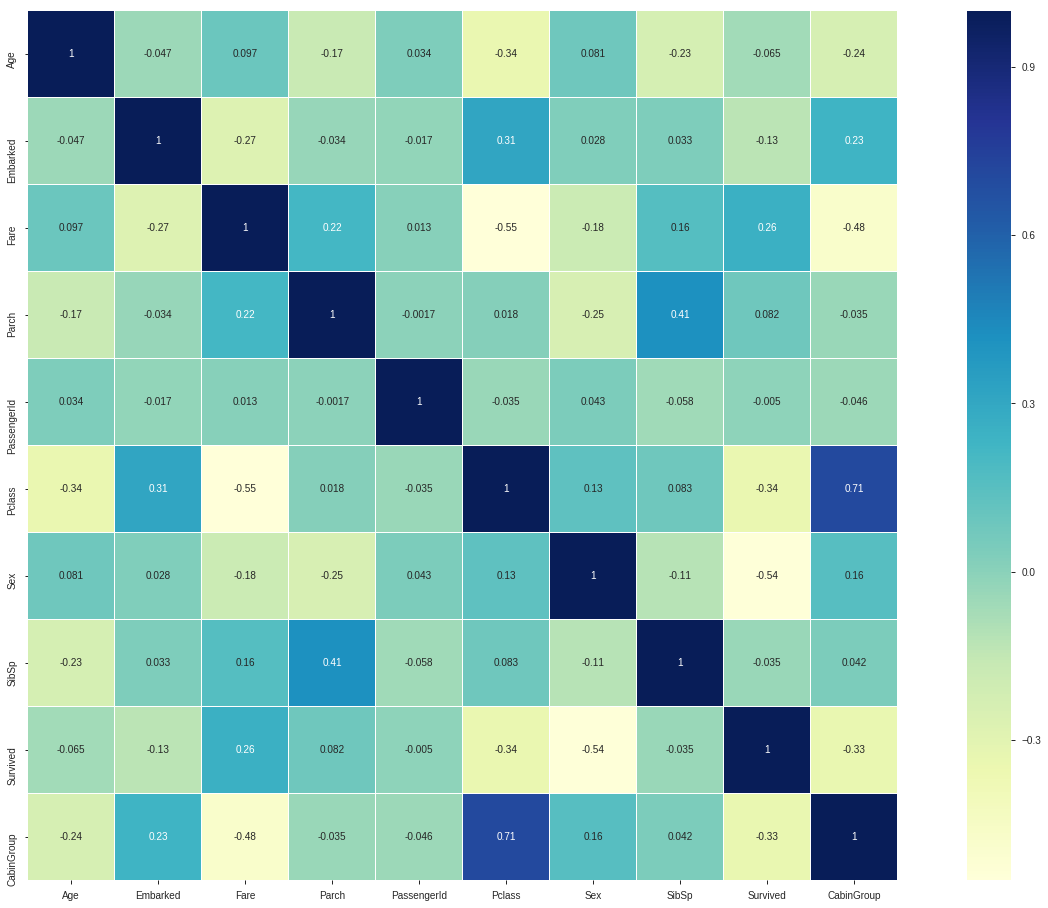

In [25]:
# making heatmap of data
#cheking whether inter correaltion exist or not


%matplotlib inline
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(train_df.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [0]:

npX = np.array(X).copy()
npy = np.array(y).copy()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
XX = scaler.fit_transform(X)
print(X.head())
print(XX)

    Age  Embarked     Fare  Parch  Pclass  Sex  SibSp  CabinGroup
0  22.0         2   7.2500      0       3    1      1           3
1  38.0         1  71.2833      0       1    0      1           1
2  26.0         2   7.9250      0       3    0      0           3
3  35.0         2  53.1000      0       1    0      1           1
4  35.0         2   8.0500      0       3    1      0           3
[[-0.56573646  0.20225613 -0.50244517 ...  0.73769513  0.43279337
   0.52056341]
 [ 0.66386103 -1.7354881   0.78684529 ... -1.35557354  0.43279337
  -1.33472457]
 [-0.25833709  0.20225613 -0.48885426 ... -1.35557354 -0.4745452
   0.52056341]
 ...
 [-0.1046374   0.20225613 -0.17626324 ... -1.35557354  0.43279337
   0.52056341]
 [-0.25833709 -1.7354881  -0.04438104 ...  0.73769513 -0.4745452
  -1.33472457]
 [ 0.20276197  2.14000037 -0.49237783 ...  0.73769513 -0.4745452
   0.52056341]]


In [0]:
X_train,X_test,y_train,y_test=train_test_split(XX,y)  # splitting dataset into traing and testing

In [57]:
svm=SVC(kernel='rbf',gamma=0.09,degree=3) #making a svm model
svm.fit(X_train,y_train) # fitting Svm
print(svm.score(X_test,y_test)) #calculating Test score 
print(svm.score(X_train,y_train))#calculating train score
print(cross_val_score(svm, XX, y, scoring = 'accuracy', cv = 10, n_jobs = -1,).mean()) #calculating Cross vailation score

from sklearn.metrics import confusion_matrix
y_pred = svm.predict(XX)
confusion_matrix(y, y_pred)

0.852017937219731
0.8278443113772455
0.821569061400522


array([[489,  60],
       [ 88, 254]])

In [55]:
model = MLPClassifier(hidden_layer_sizes=(70),solver='adam',batch_size=128,activation='tanh',learning_rate='invscaling')
model.fit(X_train,y_train) # fitting Svm
print(model.score(X_test,y_test))#calculating Test score 
print(model.score(X_train,y_train))#calculating train score
print(cross_val_score(model, XX, y, scoring = 'accuracy', cv = 10, n_jobs = -1,).mean())#calculating Cross vailation score

from sklearn.metrics import confusion_matrix
y_pred = model.predict(XX)
confusion_matrix(y, y_pred)

0.8340807174887892
0.8218562874251497


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8205206559981841


array([[476,  73],
       [ 83, 259]])

In [38]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(XX)
confusion_matrix(y, y_pred)

array([[489,  60],
       [ 88, 254]])

In [0]:
def ROC(Y_train, pred1, Y_test, pred2):
    fpr1, tpr1, thresholds1 = roc_curve(Y_train, pred1)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr1, tpr1, marker='.', color='blue', label="Train", linewidth=1.0)
    fpr2, tpr2, thresholds2 = roc_curve(Y_test, pred2)
    pyplot.plot(fpr2, tpr2, marker='.', color='red', label="Test", linewidth=1.0)
    pyplot.legend()
    pyplot.show()

In [0]:
def ROC2(X, pred, pred1, pred2):
    fpr, tpr, thresholds = roc_curve(X, pred)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr, tpr, marker='.')
    fpr1, tpr1, thresholds1 = roc_curve(X, pred1)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr1, tpr1, marker='.')
    fpr2, tpr2, thresholds2 = roc_curve(X, pred2)
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    pyplot.plot(fpr2, tpr2, marker='.')
    pyplot.show()

In [0]:
def SVM(X,Y_train,Xtest,Y_test):
    model = SVC(kernel='rbf',gamma=0.09,degree=3)
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("SVM Train Accuracy: " + str(acc1*100) + "%")
    print("SVM Test Accuracy: " + str(acc2*100) + "%")
    ROC(Y_train, pred1, Y_test, pred2)

SVM Train Accuracy: 82.78443113772454%
SVM Test Accuracy: 85.20179372197309%


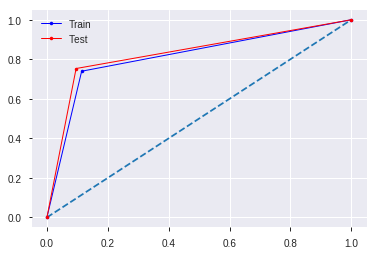

In [48]:
SVM(X_train,y_train,X_test,y_test)

In [0]:
def MLP(X,Y_train,Xtest,Y_test):
    model = MLPClassifier(hidden_layer_sizes=(70),solver='adam',batch_size=128,activation='tanh',learning_rate='invscaling')
    model.fit(X,Y_train)
    pred1 = model.predict(X)
    pred2 = model.predict(Xtest)
    acc1 = accuracy_score(Y_train,pred1)
    acc2 = accuracy_score(Y_test,pred2)
    print("SVM Train Accuracy: " + str(acc1*100) + "%")
    print("SVM Test Accuracy: " + str(acc2*100) + "%")
    ROC(Y_train, pred1, Y_test, pred2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SVM Train Accuracy: 82.78443113772454%
SVM Test Accuracy: 84.75336322869956%


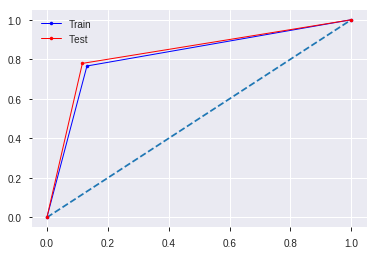

In [50]:
MLP(X_train,y_train,X_test,y_test)